In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.preprocessing import StandardScaler, MinMaxScaler

from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB

from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import train_test_split

from sklearn.metrics import accuracy_score , f1_score

In [ ]:
data = pd.read_csv("smoke_detection_iot.csv" , index_col=0)

In [ ]:
data.head(5)

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


In [ ]:
data.shape

(62630, 15)

In [ ]:
data.isnull().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.6 MB


In [ ]:
data.describe()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
count,6.263000e+04,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000,62630.000000
mean,1.654792e+09,15.970424,48.539499,1942.057528,670.021044,12942.453936,19754.257912,938.627649,100.594309,184.467770,491.463608,203.586487,80.049042,10511.386157,0.714626
std,1.100025e+05,14.359576,8.865367,7811.589055,1905.885439,272.464305,609.513156,1.331344,922.524245,1976.305615,4265.661251,2214.738556,1083.383189,7597.870997,0.451596
min,1.654712e+09,-22.010000,10.740000,0.000000,400.000000,10668.000000,15317.000000,930.852000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.654743e+09,10.994250,47.530000,130.000000,400.000000,12830.000000,19435.000000,938.700000,1.280000,1.340000,8.820000,1.384000,0.033000,3625.250000,0.000000
50%,1.654762e+09,20.130000,50.150000,981.000000,400.000000,12924.000000,19501.000000,938.816000,1.810000,1.880000,12.450000,1.943000,0.044000,9336.000000,1.000000
75%,1.654778e+09,25.409500,53.240000,1189.000000,438.000000,13109.000000,20078.000000,939.418000,2.090000,2.180000,14.420000,2.249000,0.051000,17164.750000,1.000000
max,1.655130e+09,59.930000,75.200000,60000.000000,60000.000000,13803.000000,21410.000000,939.861000,14333.690000,45432.260000,61482.030000,51914.680000,30026.438000,24993.000000,1.000000


In [ ]:
data[data.duplicated()].sum()

UTC               0.0
Temperature[C]    0.0
Humidity[%]       0.0
TVOC[ppb]         0.0
eCO2[ppm]         0.0
Raw H2            0.0
Raw Ethanol       0.0
Pressure[hPa]     0.0
PM1.0             0.0
PM2.5             0.0
NC0.5             0.0
NC1.0             0.0
NC2.5             0.0
CNT               0.0
Fire Alarm        0.0
dtype: float64

In [ ]:
data = data.drop(['UTC','CNT'], axis = 1)

In [ ]:
Features = ['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5','NC0.5','NC1.0','NC2.5']

In [ ]:
data.corr()['Fire Alarm'][Features].sort_values(ascending=False)

Humidity[%]       0.399846
Pressure[hPa]     0.249797
Raw H2            0.107007
NC2.5            -0.057707
NC1.0            -0.082828
PM2.5            -0.084916
eCO2[ppm]        -0.097006
PM1.0            -0.110552
NC0.5            -0.128118
Temperature[C]   -0.163902
TVOC[ppb]        -0.214743
Raw Ethanol      -0.340652
Name: Fire Alarm, dtype: float64

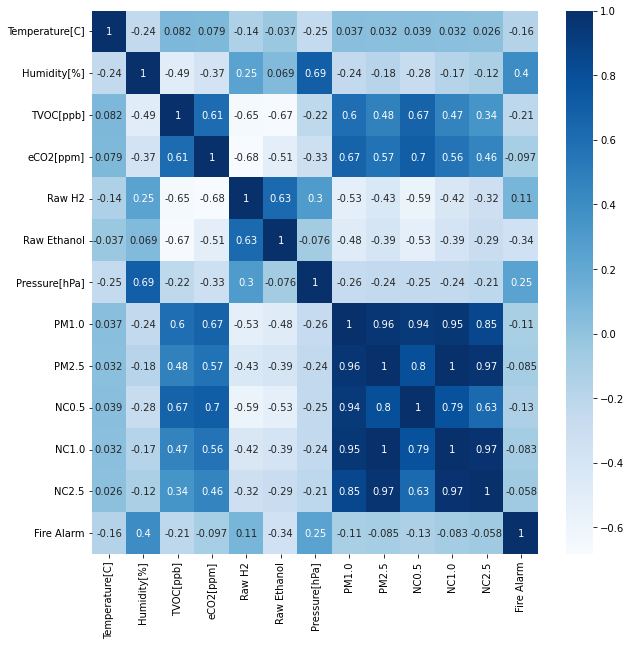

In [ ]:
plt.figure(figsize=(10, 10))
sns.heatmap(data.corr(), cbar=True, annot=True, cmap='Blues')

In [ ]:
target_column = 'Fire Alarm'
X = data[Features]
y = data[[target_column]]

In [ ]:
scaler = MinMaxScaler()
columns = X.columns
X = scaler.fit_transform(X)
X = pd.DataFrame(X, columns=columns)
X.head()

,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5
0,0.512692,0.723239,0.0,0.0,0.522488,0.525685,0.986014,0.0,0.0,0.0,0.0,0.0
1,0.512875,0.712535,0.0,0.0,0.534928,0.547185,0.987013,0.0,0.0,0.0,0.0,0.0
2,0.513046,0.701520,0.0,0.0,0.544179,0.565731,0.986347,0.0,0.0,0.0,0.0,0.0
3,0.513229,0.690971,0.0,0.0,0.549282,0.579682,0.986125,0.0,0.0,0.0,0.0,0.0
4,0.513412,0.681818,0.0,0.0,0.553429,0.591498,0.987013,0.0,0.0,0.0,0.0,0.0


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y,train_size = 0.8 , test_size=0.2, random_state=42)

In [ ]:
y_train = np.ravel(y_train)
y_test = np.ravel(y_test)

In [ ]:
#fit model logistic regression
clf = LogisticRegression(random_state=42)
gs_clf = clf.fit(X_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
#fit model naive bayes
gnb = GaussianNB()
gs_gnb = gnb.fit(X_train,y_train)

In [ ]:
#fit model random forest
rf = RandomForestClassifier(random_state=42)
gs_rf = rf.fit(X_train,y_train)

In [ ]:
#naive bayes kết quả dự đoán
y_pred_clf = gs_clf.predict(X_test)
#random forest kết quả dự đoán
y_pred_rf = gs_rf.predict(X_test)

In [ ]:
print("  RANDOM FORREST  ","Score", "      Gaussian Naive Bayes  ","Score","     Logistic Regression    ","Score")
print("     ACCURACY :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_rf)*100,".3f"),"%","           ACCURACY :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_gnb)*100,".3f"),"%","           ACCURACY :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_clf)*100,".3f"),"%")
print("     F1-SCORE :   ",format(f1_score(y_true = y_test, y_pred = y_pred_rf)*100,".3f"),"%","           F1-SCORE :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_gnb)*100,".3f"),"%","           F1-SCORE :   ",format(accuracy_score(y_true = y_test, y_pred = y_pred_clf)*100,".3f"),"%")

  RANDOM FORREST   Score       Gaussian Naive Bayes   Score      Logistic Regression     Score
     ACCURACY :    100.000 %            ACCURACY :    76.832 %            ACCURACY :    88.448 %
     F1-SCORE :    100.000 %            F1-SCORE :    76.832 %            F1-SCORE :    88.448 %
